In [ ]:
!pip install kaggle


In [ ]:
!mkdir .kaggle


mkdir: cannot create directory ‘.kaggle’: File exists


In [ ]:
import json
token = {"username":"khizer1030","key":"974288f4158f8edd30172ada6386253b"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json

- path is now set to: {/content}


In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition -p /content --force


 98% 442M/450M [00:02<00:00, 154MB/s]
100% 450M/450M [00:02<00:00, 181MB/s]


In [ ]:
!unzip \*.zip


In [ ]:

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import join
import cv2
import pandas
import os
import random

data = "flowers/flowers/"
# List out the directories inside the main input folder

folders = os.listdir(data)

print(folders)
# Import the images and resize them to a 128*128 size
# Also generate the corresponding labels

image_names = []
train_labels = []
train_images = []

size = 128,128

for folder in folders:
    for file in os.listdir(os.path.join(data,folder)):
        if file.endswith("jpg"):
            image_names.append(os.path.join(data,folder,file))
            train_labels.append(folder)
            img = cv2.imread(os.path.join(data,folder,file))
            im = cv2.resize(img,size)
            train_images.append(im)
        else:
            continue



['sunflower', 'tulip', 'daisy', 'rose', 'dandelion']


In [ ]:
train = np.array(train_images)
train.shape
# Reduce the RGB values between 0 and 1


# Extract the labels

label_dummies = pandas.get_dummies(train_labels)

labels =  label_dummies.values.argmax(1)
pandas.unique(train_labels)
pandas.unique(labels)
# Shuffle the labels and images randomly for better results

union_list = list(zip(train, labels))
random.shuffle(union_list)
train,labels = zip(*union_list)

# Convert the shuffled list to numpy array type

train = np.array(train)
labels = np.array(labels)
splitindex = int(len(labels)*0.8)
train_setX = np.array(train[0:splitindex])
train_setY = np.array((labels[0:splitindex]))
test_setX = np.array(train[splitindex:])
test_setY = np.array(labels[splitindex:])
    #print(label_dummies.columns.values[np.squeeze(train_setY[:,5])])

In [ ]:
from keras import optimizers
from keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
in1=keras.initializers.he_uniform(seed=None)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128,128,3)),
    keras.layers.Dense(256,kernel_initializer=in1),
    keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None),
    keras.layers.Activation(tf.nn.tanh),
    keras.layers.Dense(64,kernel_initializer=in1),
    keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None),
    keras.layers.Activation(tf.nn.tanh),
    keras.layers.Dense(64,kernel_initializer=in1,kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None),
    keras.layers.Activation(tf.nn.tanh),
    keras.layers.Dense(64,kernel_initializer=in1,kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None),
    keras.layers.Activation(tf.nn.tanh),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])
# Compute the model parameters
sgd=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:

train = train.astype('float32') / 255.0
history=model.fit(x=train_setX,y=train_setY,batch_size=64,epochs=100,verbose=1,validation_split=0.1)


Epoch 1/100
49/49 [==============================] - 0s 10ms/step - loss: 3.7543 - accuracy: 0.3907 - val_loss: 3.5278 - val_accuracy: 0.3844
Epoch 2/100
49/49 [==============================] - 0s 8ms/step - loss: 3.1447 - accuracy: 0.4798 - val_loss: 3.0432 - val_accuracy: 0.4162
Epoch 3/100
49/49 [==============================] - 0s 7ms/step - loss: 2.6848 - accuracy: 0.5421 - val_loss: 2.7090 - val_accuracy: 0.4509
Epoch 4/100
49/49 [==============================] - 0s 7ms/step - loss: 2.2571 - accuracy: 0.6144 - val_loss: 2.5044 - val_accuracy: 0.4335
Epoch 5/100
49/49 [==============================] - 0s 8ms/step - loss: 1.9059 - accuracy: 0.6799 - val_loss: 2.4906 - val_accuracy: 0.3815
Epoch 6/100
49/49 [==============================] - 0s 7ms/step - loss: 1.6145 - accuracy: 0.7474 - val_loss: 2.3297 - val_accuracy: 0.3988
Epoch 7/100
49/49 [==============================] - 0s 7ms/step - loss: 1.3781 - accuracy: 0.7799 - val_loss: 2.3970 - val_accuracy: 0.4104
Epoch 8/100


In [ ]:
model.evaluate(x=test_setX,y=test_setY)

28/28 [==============================] - 0s 3ms/step - loss: 4.0248 - accuracy: 0.3757


[4.024767875671387, 0.3757225573062897]

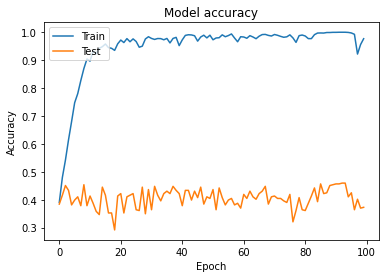

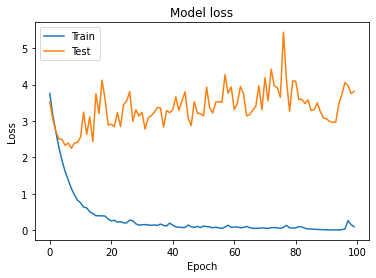

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()